# **EJERCICIO 2**

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab

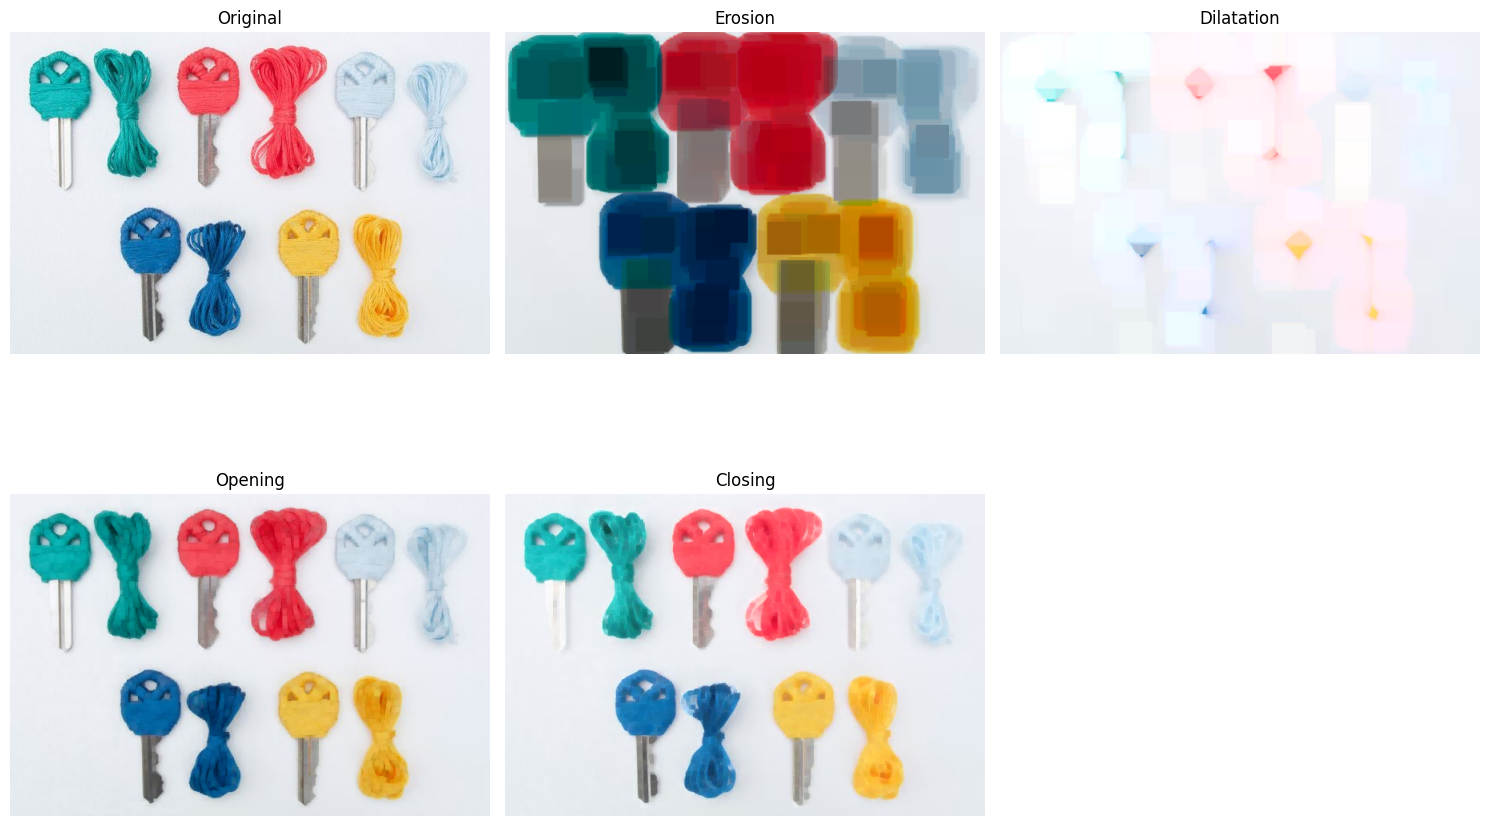

In [10]:

img = cv2.imread('image_exam/Llaves.jpg', cv2.IMREAD_UNCHANGED)

channel_blue, channel_green, channel_red = cv2.split(img) 

kernel = np.ones((5,5), np.uint8)


# Erosion de cada canal de la imagen
red_erosion = cv2.erode(channel_red, kernel, iterations=10)
green_erosion = cv2.erode(channel_green, kernel, iterations=10)
blue_erosion = cv2.erode(channel_blue, kernel, iterations=10)



# Dilatacion de cada canal de la imagen
red_dilatation = cv2.dilate(channel_red, kernel, iterations=10)
green_dilatation = cv2.dilate(channel_green, kernel, iterations=10)
blue_dilatation = cv2.dilate(channel_blue, kernel, iterations=10)


# Apertura de cada canal de la imagen
red_opening = cv2.morphologyEx(channel_red, cv2.MORPH_OPEN, kernel)
green_opening = cv2.morphologyEx(channel_green, cv2.MORPH_OPEN, kernel)
blue_opening = cv2.morphologyEx(channel_blue, cv2.MORPH_OPEN, kernel)


# Cierre de cada canal de la imagen
red_closing = cv2.morphologyEx(channel_red, cv2.MORPH_CLOSE,  kernel)
green_closing = cv2.morphologyEx(channel_green, cv2.MORPH_CLOSE, kernel)
blue_closing = cv2.morphologyEx(channel_blue, cv2.MORPH_CLOSE, kernel)



erotion_image = cv2.merge((blue_erosion, green_erosion, red_erosion))
dilatation_image = cv2.merge((blue_dilatation, green_dilatation, red_dilatation))
opening_image = cv2.merge((blue_opening, green_opening, red_opening))
closing_image = cv2.merge((blue_closing, green_closing, red_closing))


# Mostrar los resultados en una cuadrícula
titles = ['Original', 'Erosion', 'Dilatation', 'Opening', 'Closing']
images = [img, erotion_image, dilatation_image, opening_image, closing_image]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()




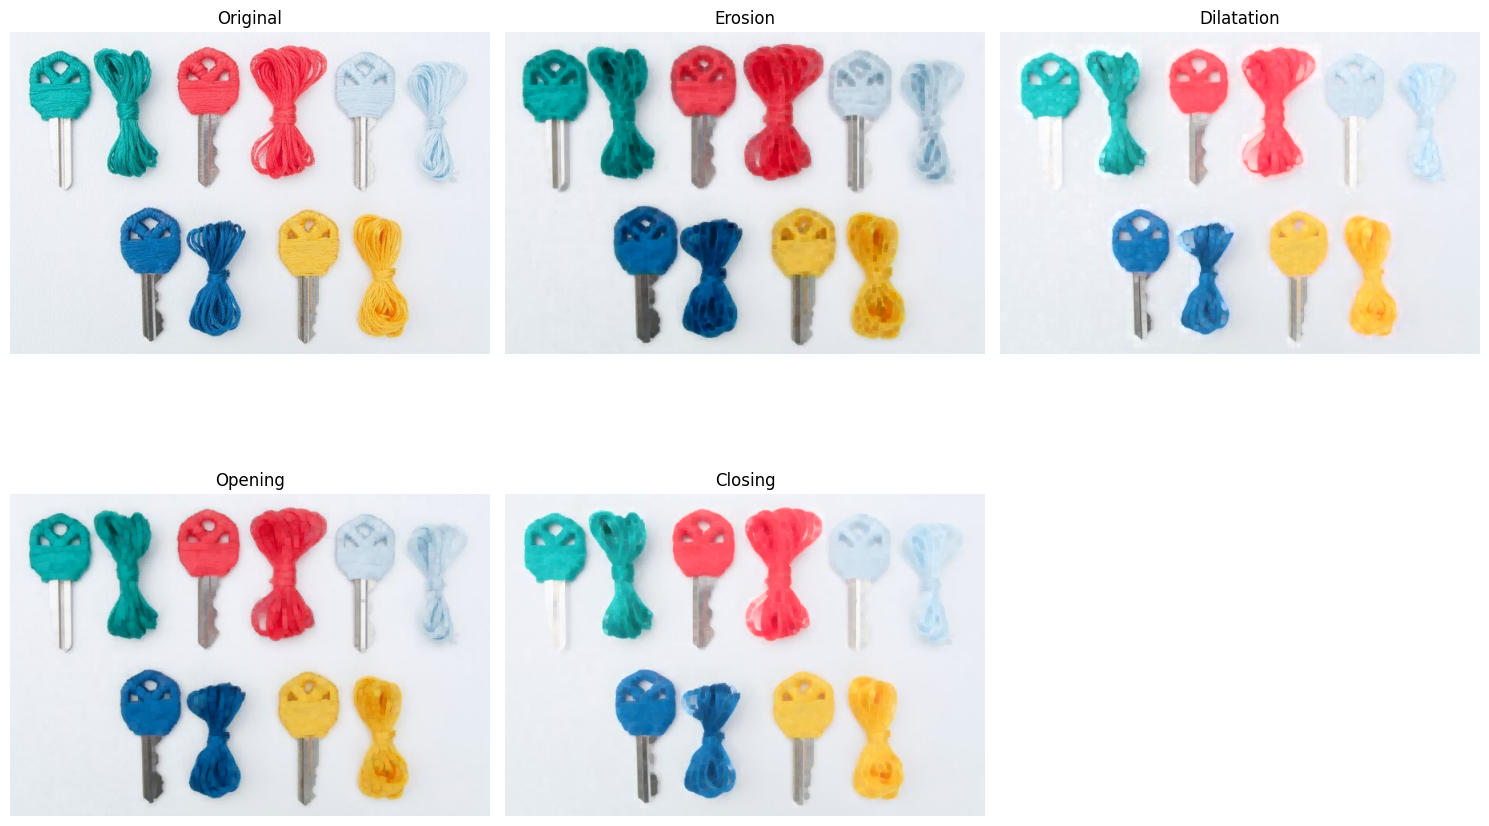

In [12]:
from skimage.morphology import erosion, dilation, opening, closing, rectangle

img = imread('image_exam/Llaves.jpg')


channel_blue = img[:, :, 2]
channel_green = img[:, :, 1]
channel_red = img[:, :, 0]

kernel = np.ones((5, 5), np.uint8)


# Erosion de cada canal de la imagen
red_erosion = erosion(channel_red, kernel)
green_erosion = erosion(channel_green, kernel)
blue_erosion = erosion(channel_blue, kernel)


# Dilatacion de cada canal de la imagen
red_dilatation = dilation(channel_red, kernel)
green_dilatation = dilation(channel_green, kernel)
blue_dilatation = dilation(channel_blue, kernel)

# Apertura de cada canal de la imagen
red_opening = opening(channel_red, kernel)
green_opening = opening(channel_green, kernel)
blue_opening = opening(channel_blue, kernel)


# Cierre de cada canal de la imagen
red_closing = closing(channel_red, kernel)
green_closing = closing(channel_green, kernel)
blue_closing = closing(channel_blue, kernel)



#combinacion de los canales
img_erosion = np.stack((red_erosion, green_erosion, blue_erosion), axis=-1)
img_dilatation = np.stack((red_dilatation, green_dilatation, blue_dilatation), axis=-1)
img_opening = np.stack((red_opening, green_opening, blue_opening), axis=-1)
img_closing = np.stack((red_closing, green_closing, blue_closing), axis=-1)

# Mostrar los resultados en una cuadrícula
titles = ['Original', 'Erosion', 'Dilatation', 'Opening', 'Closing']
images = [img, img_erosion, img_dilatation, img_opening, img_closing]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Ejercicio 4:**



In [13]:
img = cv2.imread('images_zip/lena_noise.png', cv2.IMREAD_GRAYSCALE)

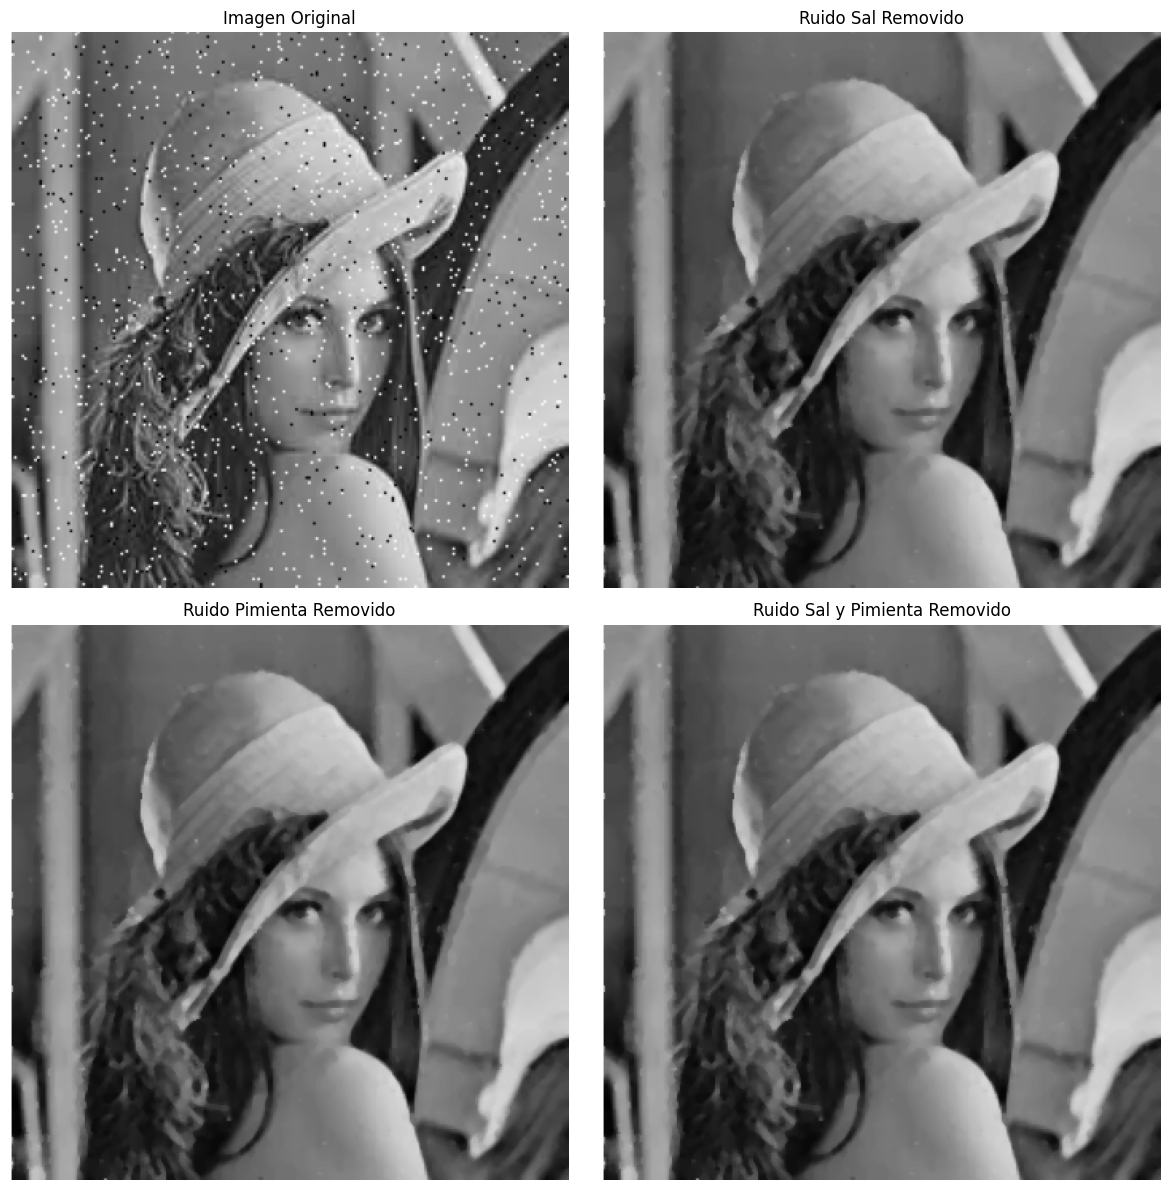

In [14]:
import cv2
import matplotlib.pyplot as plt

def remove_salt_noise(image, kernel_size):
    """
    Remove salt noise (white noise) from the image using a median filter.
    
    Parameters:
    image (numpy.ndarray): Input image with salt noise.
    kernel_size (int): Size of the kernel to be used for the median filter.
    
    Returns:
    numpy.ndarray: Image with salt noise removed.
    """
    return cv2.medianBlur(image, kernel_size)

def remove_pepper_noise(image, kernel_size):
    """
    Remove pepper noise (black noise) from the image using a median filter.
    
    Parameters:
    image (numpy.ndarray): Input image with pepper noise.
    kernel_size (int): Size of the kernel to be used for the median filter.
    
    Returns:
    numpy.ndarray: Image with pepper noise removed.
    """
    return cv2.medianBlur(image, kernel_size)

def remove_salt_and_pepper_noise(image, kernel_size):
    """
    Remove both salt and pepper noise from the image using a median filter.
    
    Parameters:
    image (numpy.ndarray): Input image with salt and pepper noise.
    kernel_size (int): Size of the kernel to be used for the median filter.
    
    Returns:
    numpy.ndarray: Image with both salt and pepper noise removed.
    """
    return cv2.medianBlur(image, kernel_size)



image_salt_removed = remove_salt_noise(img, 5)
image_pepper_removed = remove_pepper_noise(img, 5)
image_salt_pepper_removed = remove_salt_and_pepper_noise(img, 5)


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(image_salt_removed, cmap='gray')
axes[0, 1].set_title('Ruido Sal Removido')
axes[0, 1].axis('off')

axes[1, 0].imshow(image_pepper_removed, cmap='gray')
axes[1, 0].set_title('Ruido Pimienta Removido')
axes[1, 0].axis('off')

axes[1, 1].imshow(image_salt_pepper_removed, cmap='gray')
axes[1, 1].set_title('Ruido Sal y Pimienta Removido')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()





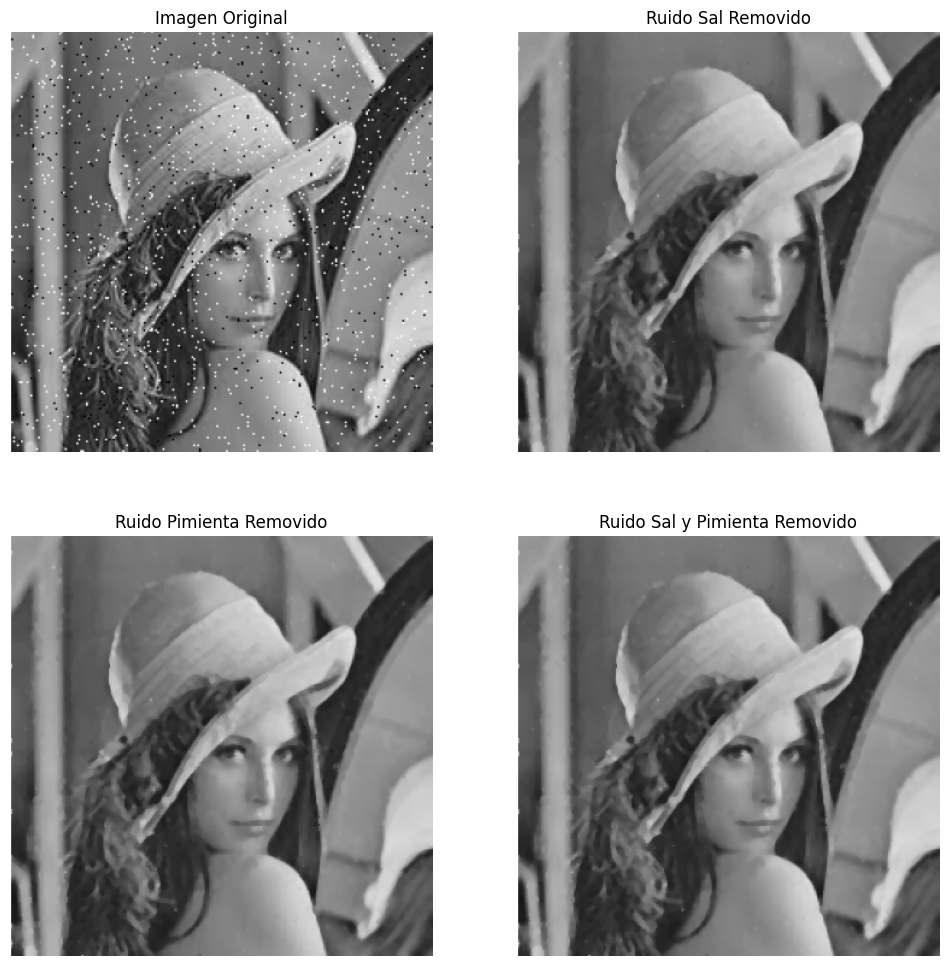

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_noise(image, kernel_size, noise_type='salt_pepper'):
    """
    Remove noise from the image using a median filter.
    
    Parameters:
    image (numpy.ndarray): Input image with noise.
    kernel_size (int): Size of the kernel to be used for the median filter.
    noise_type (str): Type of noise to remove ('salt', 'pepper', 'salt_pepper').
    
    Returns:
    numpy.ndarray: Image with specified noise removed.
    """
    if noise_type not in ['salt', 'pepper', 'salt_pepper']:
        raise ValueError("noise_type must be 'salt', 'pepper', or 'salt_pepper'")
    
    # Apply median filter to remove noise
    return cv2.medianBlur(image, kernel_size)

# Load the image (assuming 'image' is already loaded)
# image = cv2.imread('path_to_image')

# Remove salt noise
image_salt_removed = remove_noise(img, 5, noise_type='salt')

# Remove pepper noise
image_pepper_removed = remove_noise(img,5, noise_type='pepper')

# Remove both salt and pepper noise
image_salt_pepper_removed = remove_noise(img, 5, noise_type='salt_pepper')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Display images in the subplots
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Imagen Original')

axs[0, 1].imshow(cv2.cvtColor(image_salt_removed, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Ruido Sal Removido')

axs[1, 0].imshow(cv2.cvtColor(image_pepper_removed, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Ruido Pimienta Removido')

axs[1, 1].imshow(cv2.cvtColor(image_salt_pepper_removed, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Ruido Sal y Pimienta Removido')

# Hide axes
for ax in axs.flat:
    ax.axis('off')

# Show the figure
plt.show()

# **Ejercicio 5:**
Cree una clase en Python que acepte una imagen en escala de grises como entrada y proporcione métodos para aplicar varios filtros de procesamiento de imágenes, incluyendo Sobel, Scharr, Laplace, Roberts, Prewitt y un filtro personalizado todo esto sin usar librerías, operación a Pedal.(10%)

Requisitos:

1. **Clase de Procesamiento de Imágenes:**

Cree una clase llamada ImageProcessor que acepte una imagen en escala de grises como entrada durante la inicialización de la clase.
La imagen se puede representar como una matriz NumPy 2D, donde cada elemento de la matriz corresponde a un píxel en la imagen en escala de grises.

2. **Métodos de Filtros:**

Implemente métodos dentro de la clase ImageProcessor para aplicar los siguientes filtros:
- Filtro Sobel.
- Filtro Scharr.
- Filtro Laplace.
- Filtro Roberts.
- Filtro Prewitt.
- Filtro personalizado: Permita que el usuario defina una matriz de convolución personalizada y aplique el filtro a la imagen.


3. **Resultado de los Filtros:**

- Los métodos de filtros deben devolver una nueva imagen en escala de grises que representa el resultado de aplicar el filtro correspondiente.
- La nueva imagen se puede representar como una matriz NumPy 2D.
4. **Documentación y Ejemplos:**

* Proporcione documentación clara y comentarios en el código para explicar cómo usar la clase ImageProcessor y sus métodos.
* Proporcione ejemplos de cómo cargar una imagen en escala de grises, crear una instancia de la clase ImageProcessor y aplicar los diferentes filtros.


Ejemplo de Uso:
```python
# Crear una instancia de ImageProcessor con una imagen en escala de grises
processor = ImageProcessor(grayscale_image)

# Aplicar el filtro Sobel
sobel_result = processor.apply_sobel()

# Aplicar el filtro Scharr
scharr_result = processor.apply_scharr()

# Aplicar el filtro Laplace
laplace_result = processor.apply_laplace()

# Aplicar el filtro Roberts
roberts_result = processor.apply_roberts()

# Aplicar el filtro Prewitt
prewitt_result = processor.apply_prewitt()

# Aplicar un filtro personalizado
custom_filter = [[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]]
custom_result = processor.apply_custom_filter(custom_filter)
```

In [10]:

import cv2

gray_image = cv2.imread('image_exam/Llaves.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
img_processor = ImageProcessor(gray_image)

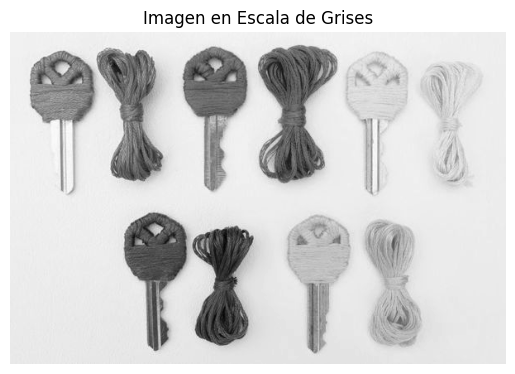

In [23]:
import matplotlib.pyplot as plt
from skimage import io, color

gray_img = color.rgb2gray(io.imread('image_exam/Llaves.jpg'))

plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title('Imagen en Escala de Grises')
plt.show()

In [25]:
import numpy as np

class ImageProcessor:
    def __init__(self, grayscale_image):
        """
        Inicializa la clase ImageProcessor con una imagen en escala de grises.

        Args:
        - grayscale_image: Matriz NumPy 2D que representa la imagen en escala de grises.
        """
        self.image = grayscale_image

    def _convolve2d(self, kernel):
        """
        Realiza una convolución 2D manual sobre la imagen con el núcleo dado.

        Args:
        - kernel: Matriz NumPy 2D que representa el núcleo del filtro.

        Returns:
        Una nueva imagen en escala de grises con el resultado de la convolución.
        """
        kernel = np.flipud(np.fliplr(kernel))  
        image_padded = np.pad(self.image, ((1, 1), (1, 1)), mode='edge')  # Agrega bordes
        output = np.zeros_like(self.image)

        for i in range(self.image.shape[0]):
            for j in range(self.image.shape[1]):
                region = image_padded[i:i + kernel.shape[0], j:j + kernel.shape[1]]
                output[i, j] = np.sum(region * kernel)

        return output.clip(0, 255)

    def apply_sobel(self):
        """
        Aplica el filtro Sobel a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Sobel.
        """
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

        gradient_x = self._convolve2d(sobel_x)
        gradient_y = self._convolve2d(sobel_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_scharr(self):
        """
        Aplica el filtro Scharr a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Scharr.
        """
        scharr_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
        scharr_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

        gradient_x = self._convolve2d(scharr_x)
        gradient_y = self._convolve2d(scharr_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_laplace(self):
        """
        Aplica el filtro Laplace a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Laplace.
        """
        laplace_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        laplace_result = self._convolve2d(laplace_filter)
        return laplace_result

    def apply_roberts(self):
        """
        Aplica el filtro Roberts a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Roberts.
        """
        roberts_x = np.array([[1, 0], [0, -1]])
        roberts_y = np.array([[0, 1], [-1, 0]])

        gradient_x = self._convolve2d(roberts_x)
        gradient_y = self._convolve2d(roberts_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_prewitt(self):
        """
        Aplica el filtro Prewitt a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Prewitt.
        """
        prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

        gradient_x = self._convolve2d(prewitt_x)
        gradient_y = self._convolve2d(prewitt_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_custom_filter(self, custom_filter):
        """
        Aplica un filtro personalizado a la imagen.

        Args:
        - custom_filter: Matriz NumPy 2D que representa el filtro personalizado.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro personalizado.
        """
        custom_result = self._convolve2d(custom_filter)
        return custom_result


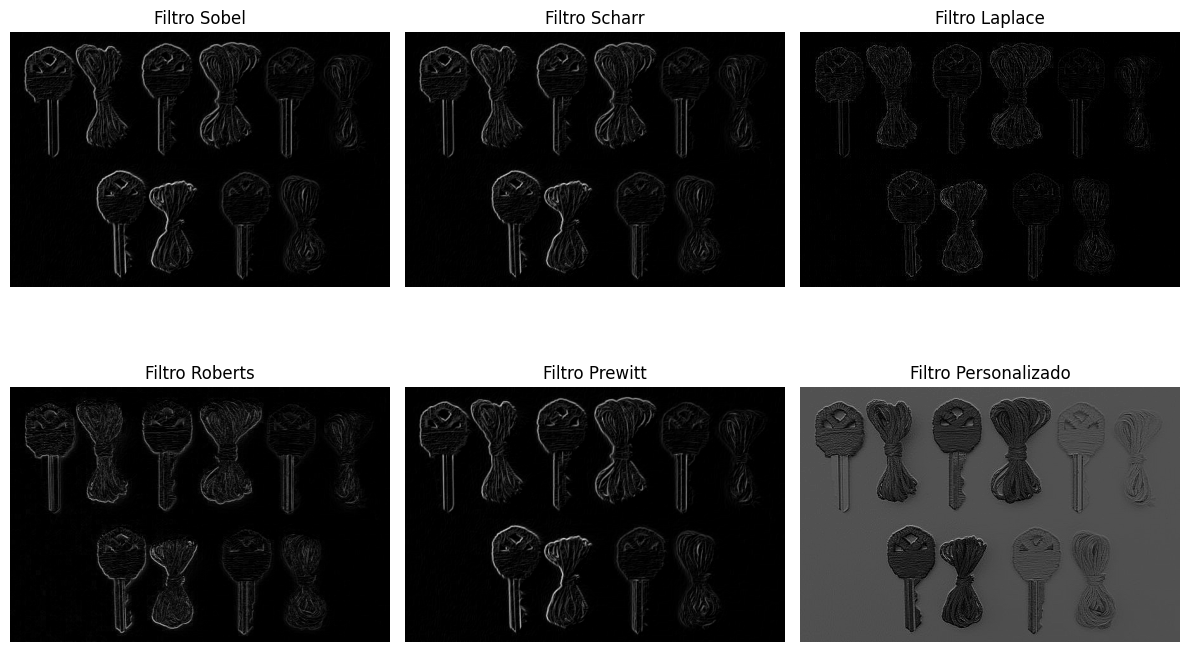

In [27]:
img_processor = ImageProcessor(gray_img)

sobel_result = img_processor.apply_sobel()
scharr_result = img_processor.apply_scharr()
laplace_result = img_processor.apply_laplace()
roberts_result = img_processor.apply_roberts()
prewitt_result = img_processor.apply_prewitt()
custom_filter = np.array([[-1, -10, -1], [-1, 20, -1], [-1, -1, -1]]) 
custom_result = img_processor.apply_custom_filter(custom_filter)

# Visualización
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].imshow(sobel_result, cmap='gray')
axs[0, 0].set_title('Filtro Sobel')
axs[0, 1].imshow(scharr_result, cmap='gray')
axs[0, 1].set_title('Filtro Scharr')
axs[0, 2].imshow(laplace_result, cmap='gray')
axs[0, 2].set_title('Filtro Laplace')
axs[1, 0].imshow(roberts_result, cmap='gray')
axs[1, 0].set_title('Filtro Roberts')
axs[1, 1].imshow(prewitt_result, cmap='gray')
axs[1, 1].set_title('Filtro Prewitt')
axs[1, 2].imshow(custom_result, cmap='gray')
axs[1, 2].set_title('Filtro Personalizado')

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()